In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
file_list = glob.glob('/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/*/*-photom.fits')
print(len(file_list))

1256


In [5]:
f_list = np.random.choice(file_list, size=100, replace=False)
print(len(f_list))

100


In [6]:
f_list

array(['/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20200210/c4d_200211_014119_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20200307/c4d_200308_005203_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20201124/c4d_201125_024416_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20200130/c4d_200131_011758_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20191213/c4d_191214_060501_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20200205/c4d_200206_015550_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20201121/c4d_201122_020449_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/decam/DECam_CP-DR10c/CP20200206/c4d_200207_005657_ooi_i_v1-photom.fits',
       '/global/cscratch1/sd/dstn/dr10pre/zpt/de

c4d_200201_022627_ooi_i_v1-photom.fits 17775


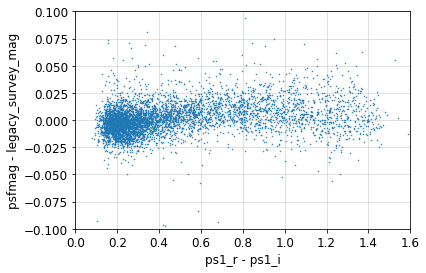

c4d_210322_004029_ooi_i_v1-photom.fits 10127


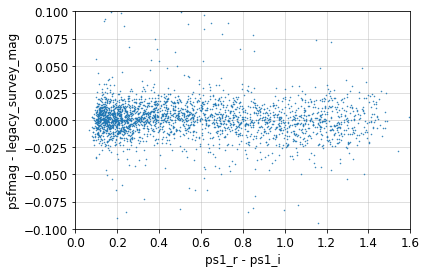

c4d_210427_001737_ooi_i_v1-photom.fits 10378


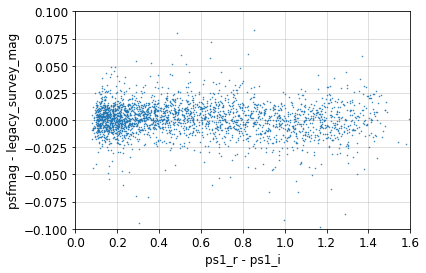

c4d_190914_083356_ooi_i_v1-photom.fits 10328


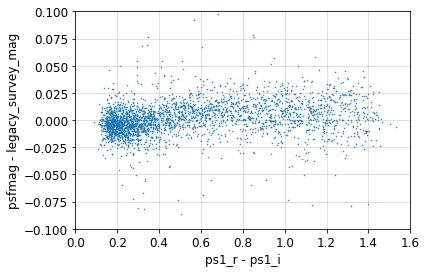

c4d_200305_002201_ooi_i_v1-photom.fits 8209


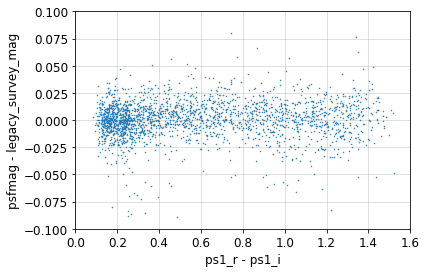

c4d_200104_034017_ooi_i_v1-photom.fits 15528


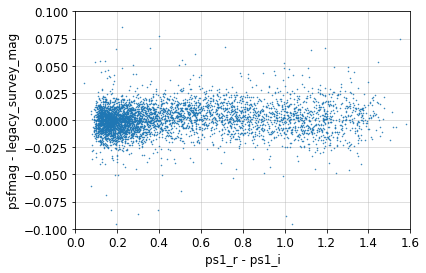

c4d_200229_004901_ooi_i_v1-photom.fits 18196


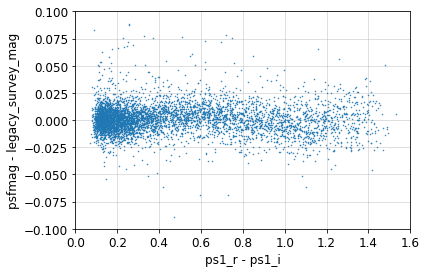

c4d_200201_021029_ooi_i_v1-photom.fits 15942


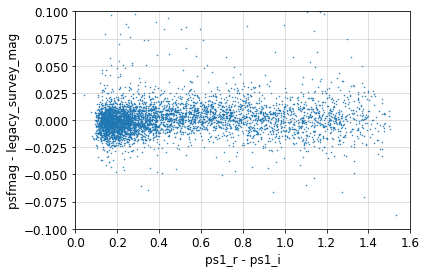

c4d_200211_020147_ooi_i_v1-photom.fits 10636


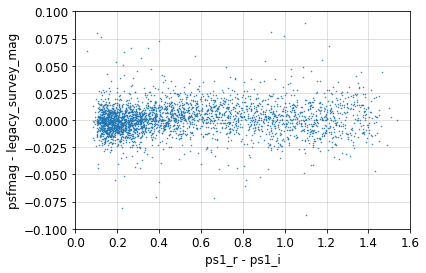

c4d_210222_002849_ooi_i_v1-photom.fits 7302


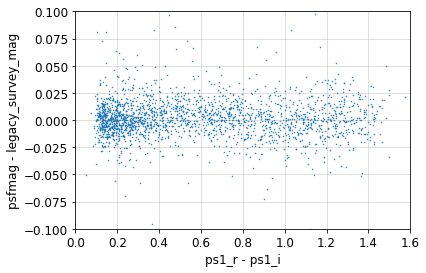

c4d_191009_042749_ooi_i_v1-photom.fits 7876


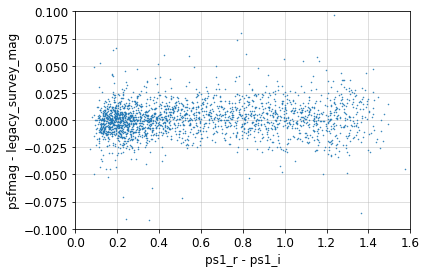

c4d_200208_042213_ooi_i_v1-photom.fits 34036


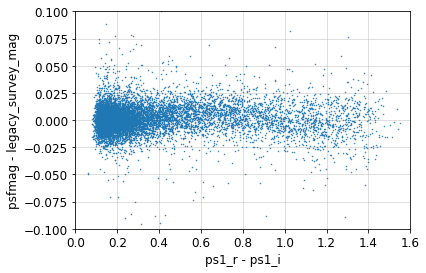

c4d_200306_004617_ooi_i_v1-photom.fits 13404


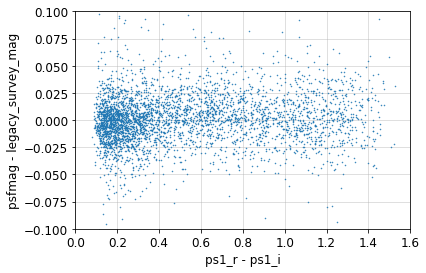

c4d_191215_043204_ooi_i_v1-photom.fits 8633


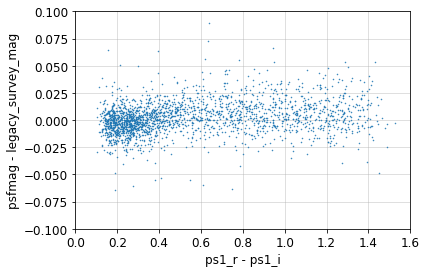

c4d_201125_025626_ooi_i_v1-photom.fits 10548


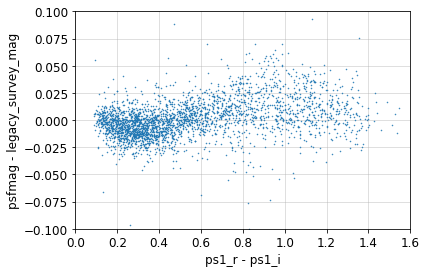

c4d_200207_021047_ooi_i_v1-photom.fits 10051


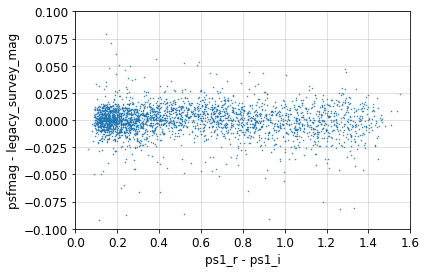

c4d_191207_054803_ooi_i_v1-photom.fits 18976


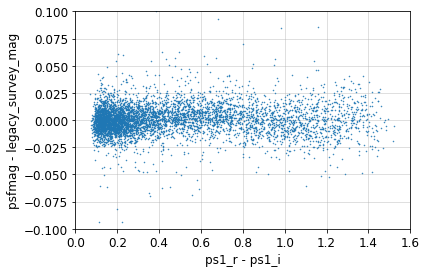

c4d_200305_012825_ooi_i_v1-photom.fits 12746


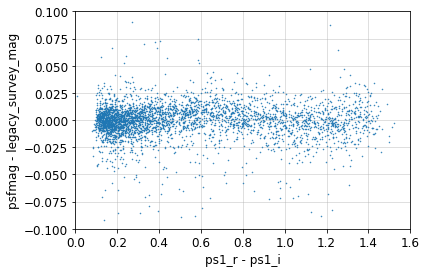

c4d_210418_004711_ooi_i_v1-photom.fits 10303


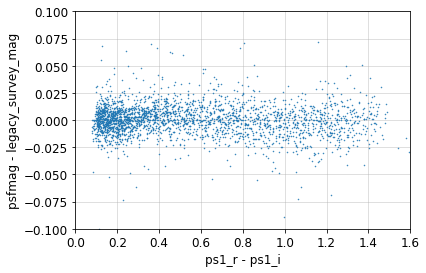

c4d_200208_005304_ooi_i_v1-photom.fits 28907


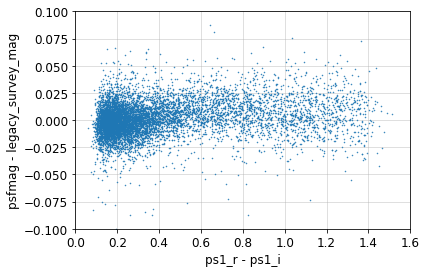

c4d_200207_015324_ooi_i_v1-photom.fits 21372


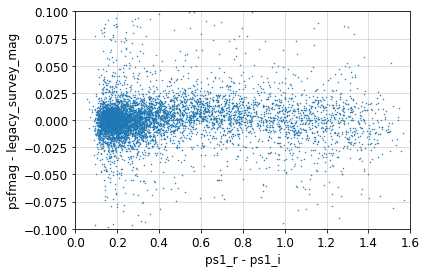

c4d_201121_043437_ooi_i_v1-photom.fits 28819


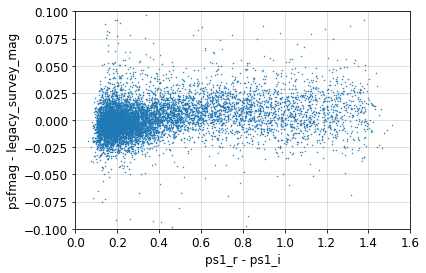

c4d_210224_020002_ooi_i_v1-photom.fits 13565


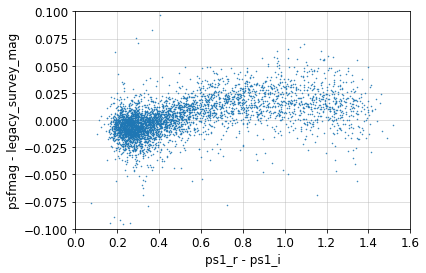

c4d_191215_050232_ooi_i_v1-photom.fits 11073


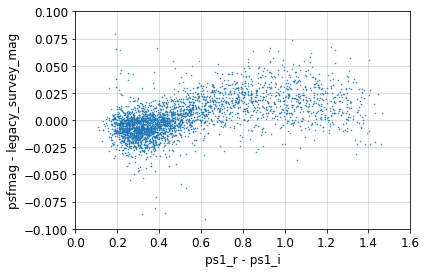

c4d_200211_012749_ooi_i_v1-photom.fits 9348


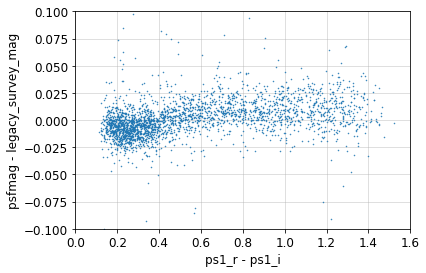

c4d_200211_010701_ooi_i_v1-photom.fits 8749


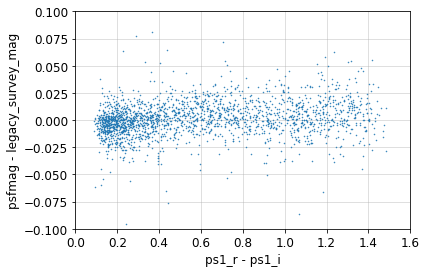

c4d_210219_003513_ooi_i_v1-photom.fits 27723


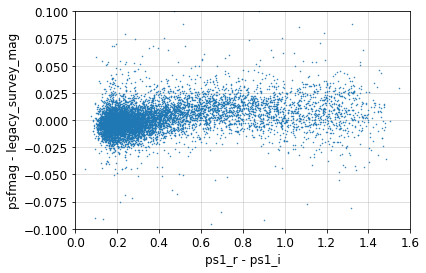

c4d_200104_042112_ooi_i_v1-photom.fits 23403


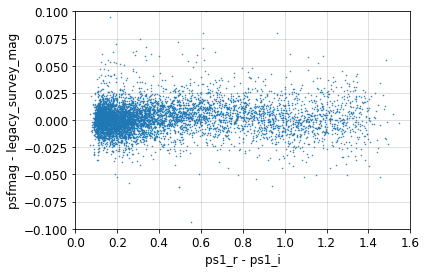

c4d_210321_000031_ooi_i_v1-photom.fits 11798


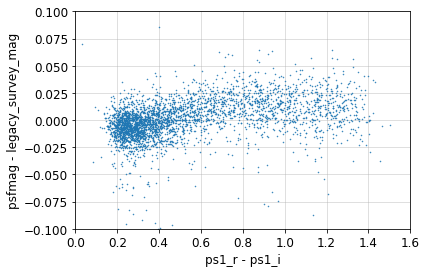

c4d_200104_033654_ooi_i_v1-photom.fits 17739


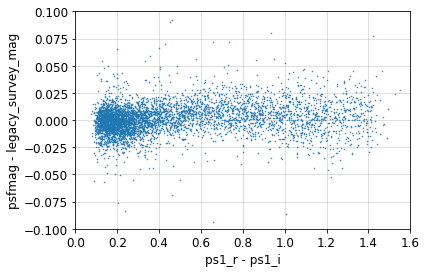

c4d_200208_035724_ooi_i_v1-photom.fits 26220


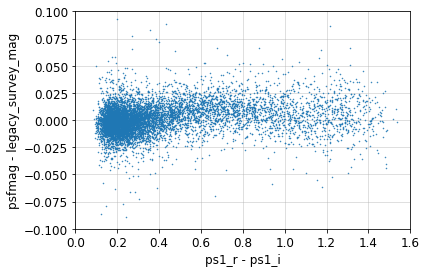

c4d_210227_004857_ooi_i_v1-photom.fits 10295


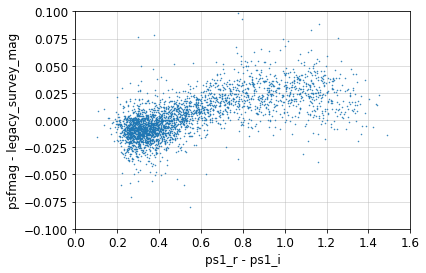

c4d_210326_001054_ooi_i_v1-photom.fits 16066


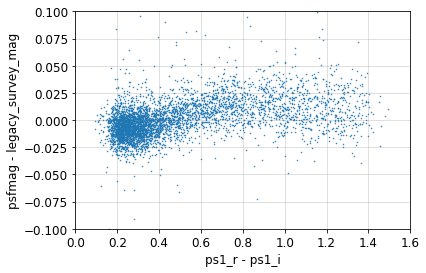

c4d_191025_073528_ooi_i_v1-photom.fits 12309


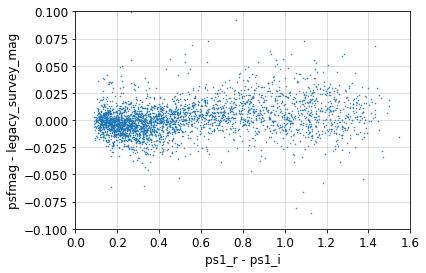

c4d_200211_020757_ooi_i_v1-photom.fits 12290


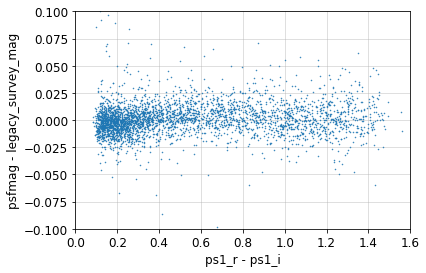

c4d_200205_004520_ooi_i_v1-photom.fits 9539


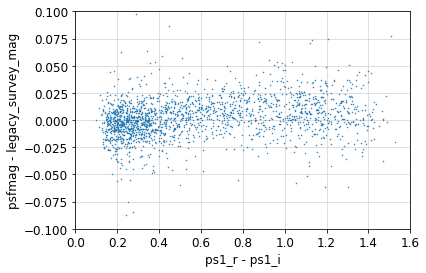

c4d_190914_083745_ooi_i_v1-photom.fits 10272


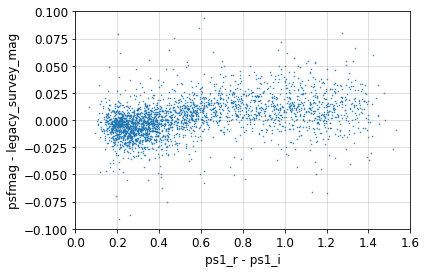

c4d_200306_012649_ooi_i_v1-photom.fits 26598


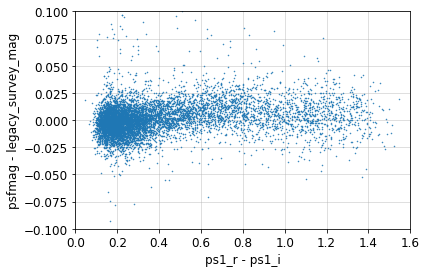

c4d_200227_010324_ooi_i_v1-photom.fits 8550


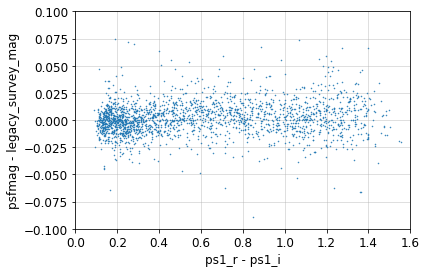

c4d_200207_005657_ooi_i_v1-photom.fits 13115


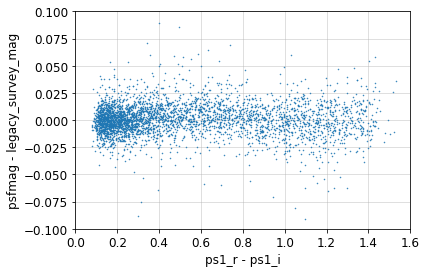

c4d_191215_054634_ooi_i_v1-photom.fits 21540


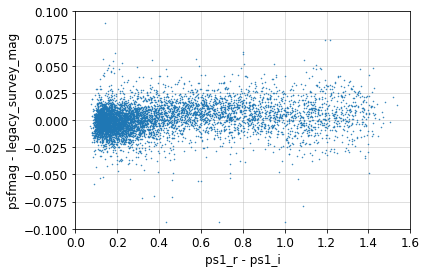

c4d_200205_013758_ooi_i_v1-photom.fits 8160


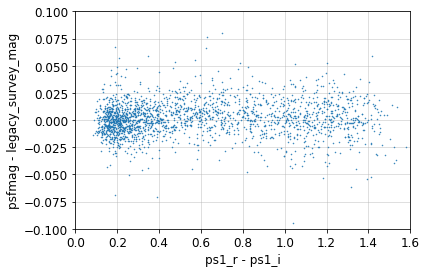

c4d_200306_004419_ooi_i_v1-photom.fits 12748


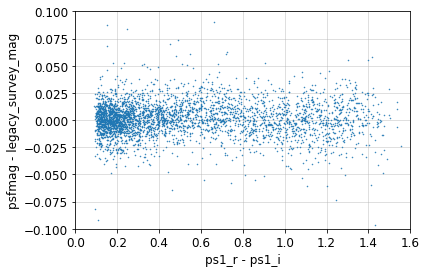

c4d_210319_003928_ooi_i_v1-photom.fits 10129


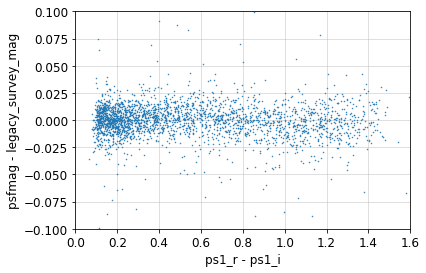

c4d_210217_023552_ooi_i_v1-photom.fits 24998


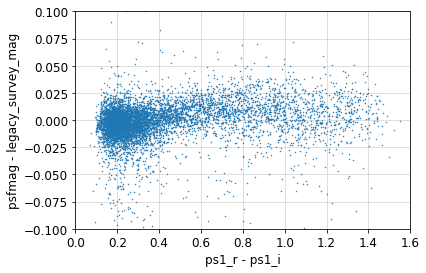

c4d_201125_021614_ooi_i_v1-photom.fits 8565


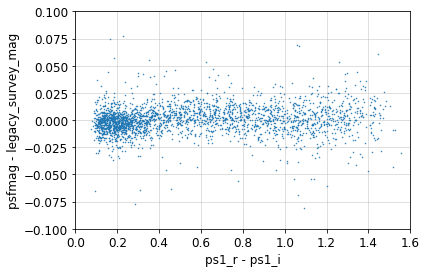

c4d_210301_001814_ooi_i_v1-photom.fits 17173


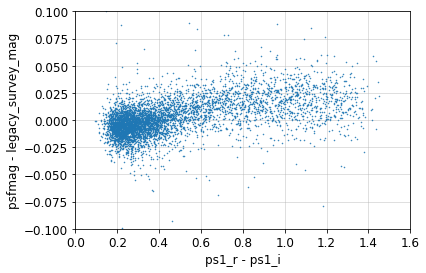

c4d_210303_001900_ooi_i_v1-photom.fits 7985


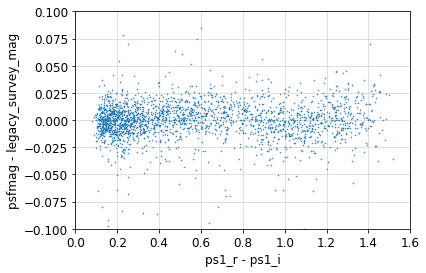

c4d_191214_062236_ooi_i_v1-photom.fits 29512


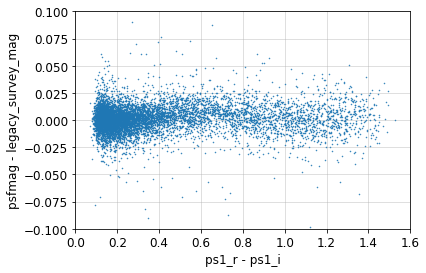

c4d_200211_025634_ooi_i_v1-photom.fits 10702


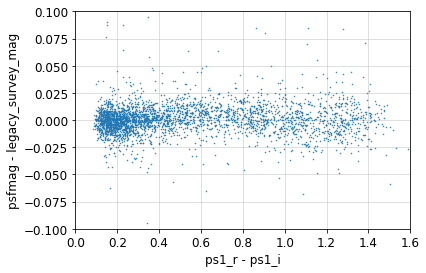

c4d_200131_013405_ooi_i_v1-photom.fits 14547


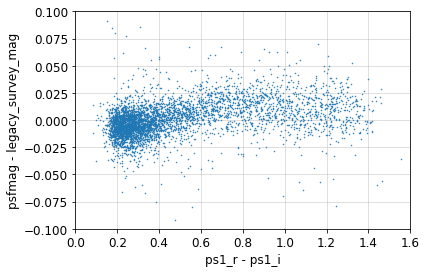

c4d_210328_031004_ooi_i_v1-photom.fits 10672


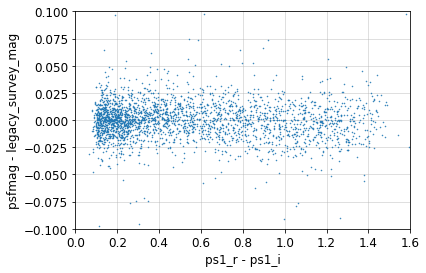

c4d_200201_004330_ooi_i_v1-photom.fits 9736


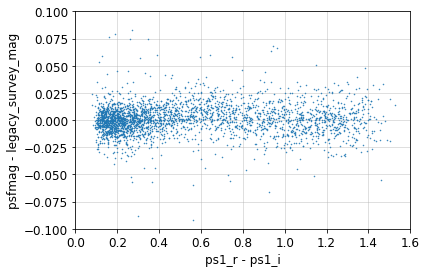

c4d_210228_005944_ooi_i_v1-photom.fits 8072


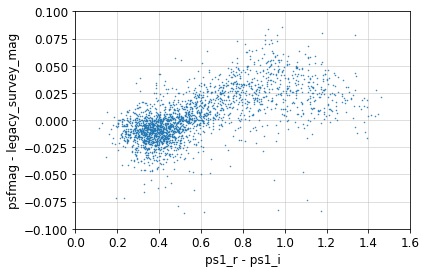

c4d_210425_032058_ooi_i_v1-photom.fits 10454


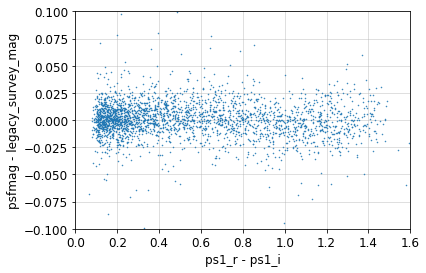

c4d_201126_045557_ooi_i_v1-photom.fits 19368


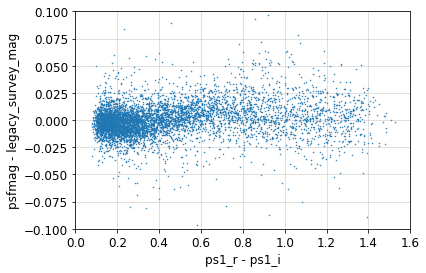

c4d_191207_045619_ooi_i_v1-photom.fits 17761


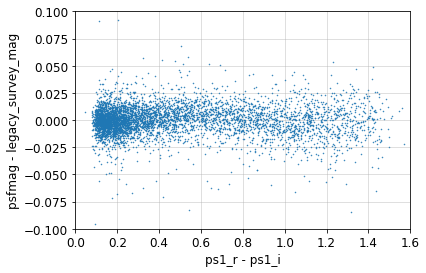

c4d_191215_042916_ooi_i_v1-photom.fits 9421


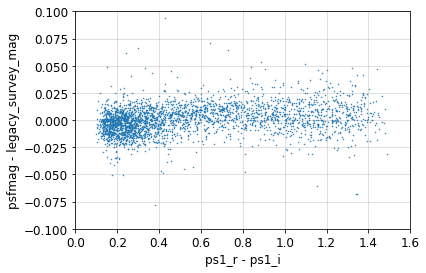

c4d_191107_021738_ooi_i_v1-photom.fits 6939


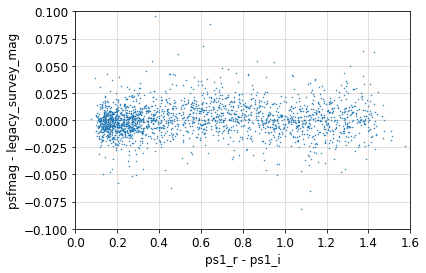

c4d_200211_033732_ooi_i_v1-photom.fits 13763


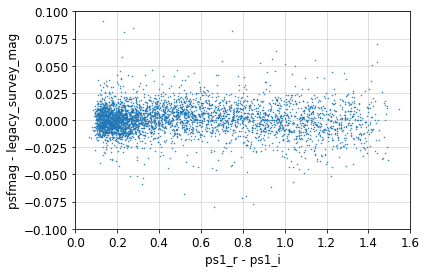

c4d_210228_011037_ooi_i_v1-photom.fits 8377


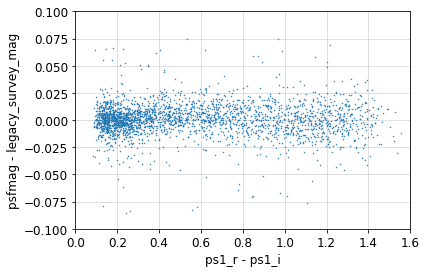

c4d_200306_005617_ooi_i_v1-photom.fits 14274


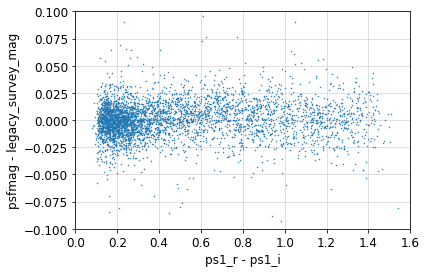

c4d_210326_000906_ooi_i_v1-photom.fits 14581


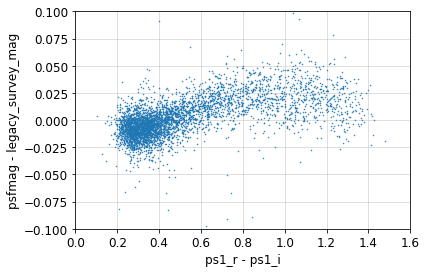

c4d_191214_055730_ooi_i_v1-photom.fits 27951


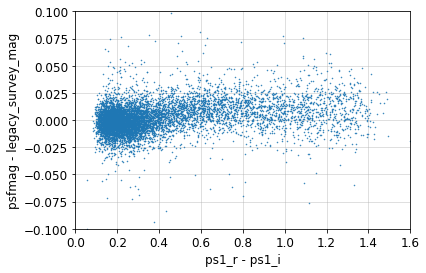

c4d_200208_040121_ooi_i_v1-photom.fits 30908


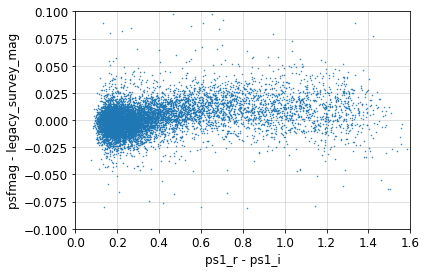

c4d_200309_004734_ooi_i_v1-photom.fits 14105


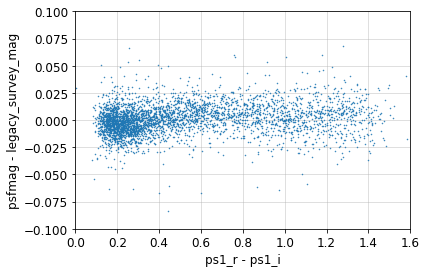

c4d_191009_040941_ooi_i_v1-photom.fits 7503


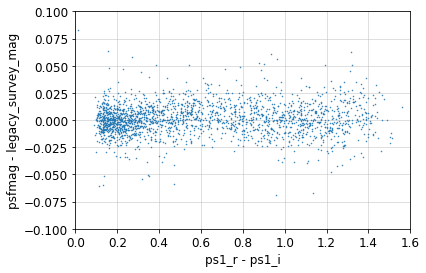

c4d_210227_011423_ooi_i_v1-photom.fits 9455


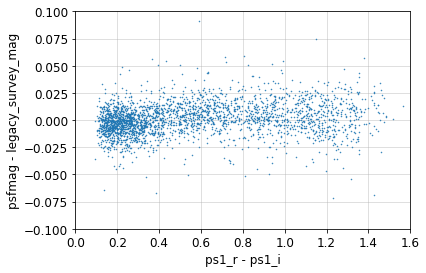

c4d_200202_014453_ooi_i_v1-photom.fits 30485


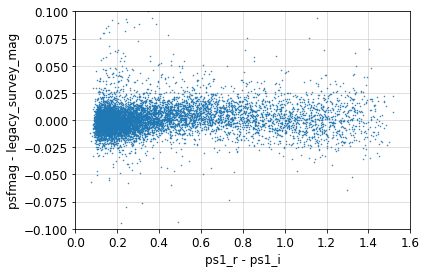

c4d_200211_013539_ooi_i_v1-photom.fits 9615


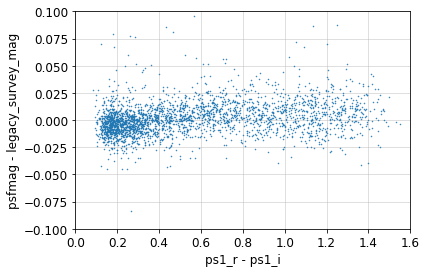

c4d_200208_020239_ooi_i_v1-photom.fits 9660


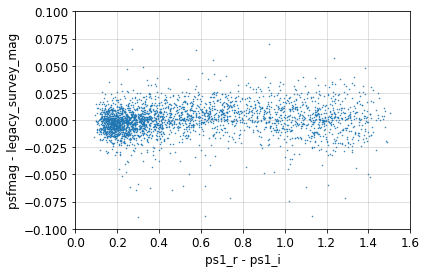

c4d_210203_004909_ooi_i_v1-photom.fits 7835


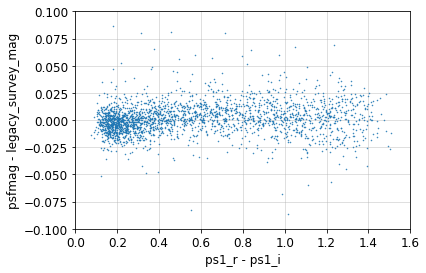

c4d_200208_015045_ooi_i_v1-photom.fits 14272


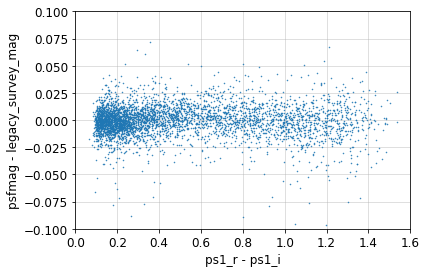

c4d_200211_015423_ooi_i_v1-photom.fits 10253


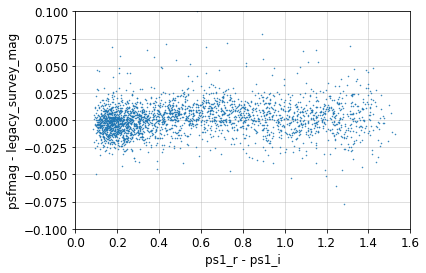

c4d_200206_015352_ooi_i_v1-photom.fits 10979


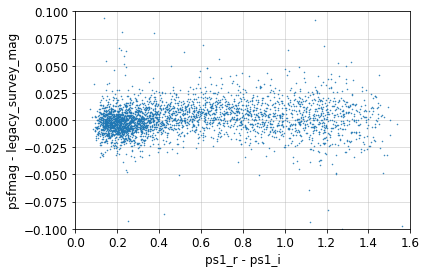

c4d_210224_015508_ooi_i_v1-photom.fits 12848


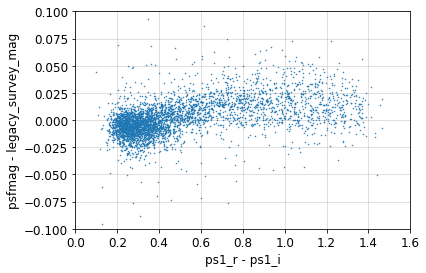

c4d_210326_235307_ooi_i_v1-photom.fits 13290


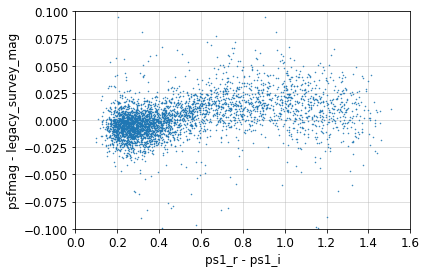

c4d_191215_051130_ooi_i_v1-photom.fits 21775


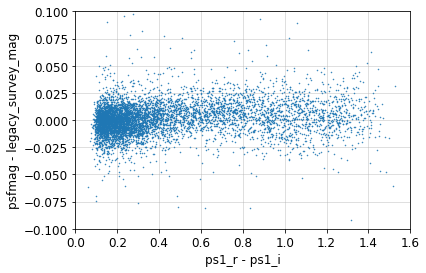

c4d_200211_012145_ooi_i_v1-photom.fits 8807


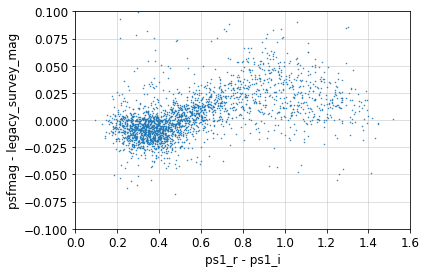

c4d_201126_050550_ooi_i_v1-photom.fits 20485


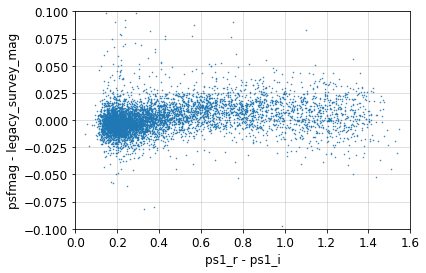

c4d_210224_013457_ooi_i_v1-photom.fits 9672


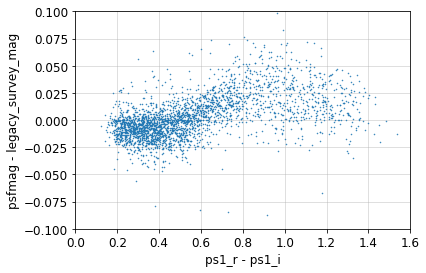

c4d_200207_014903_ooi_i_v1-photom.fits 15859


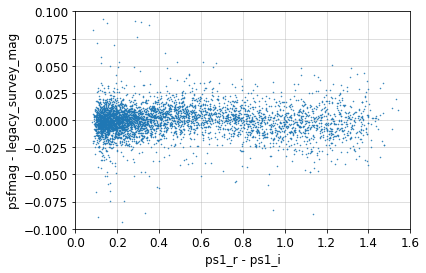

c4d_210321_000607_ooi_i_v1-photom.fits 14902


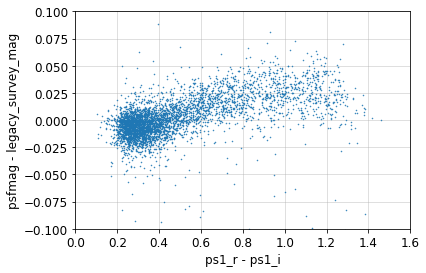

c4d_210223_003400_ooi_i_v1-photom.fits 8499


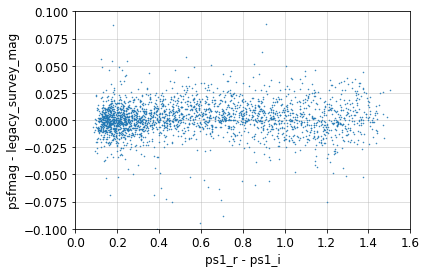

c4d_200317_002424_ooi_i_v1-photom.fits 22257


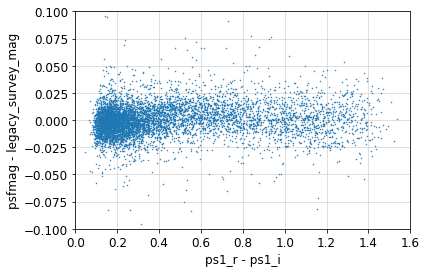

c4d_210301_002459_ooi_i_v1-photom.fits 14245


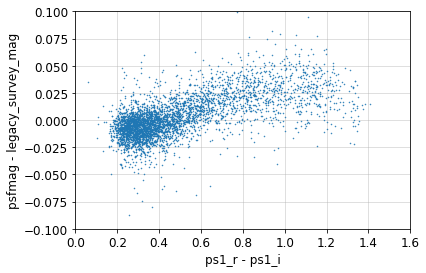

c4d_201125_025826_ooi_i_v1-photom.fits 10269


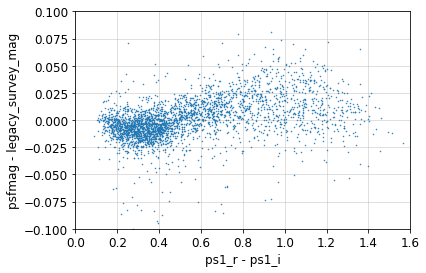

c4d_200211_014119_ooi_i_v1-photom.fits 9879


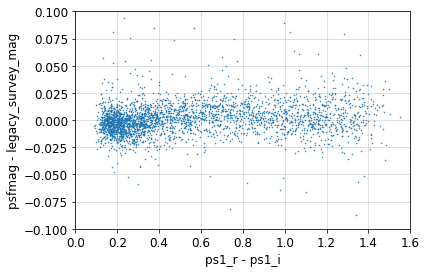

c4d_210421_010512_ooi_i_v1-photom.fits 10527


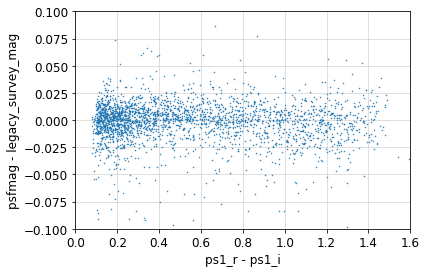

c4d_191204_050736_ooi_i_v1-photom.fits 22385


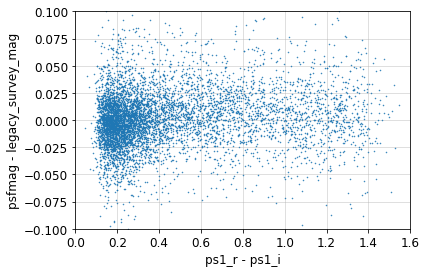

c4d_200208_013055_ooi_i_v1-photom.fits 28382


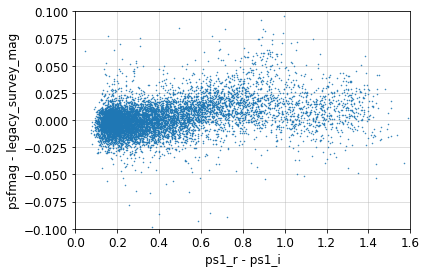

c4d_200205_015624_ooi_i_v1-photom.fits 12572


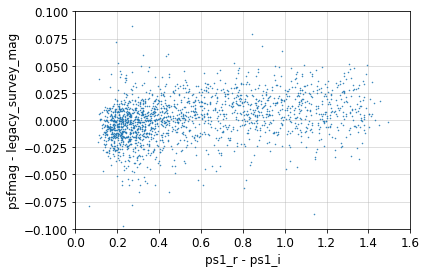

c4d_201122_025517_ooi_i_v1-photom.fits 26263


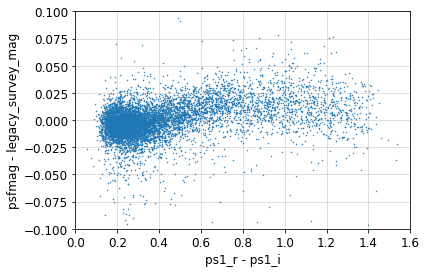

c4d_200206_013749_ooi_i_v1-photom.fits 10434


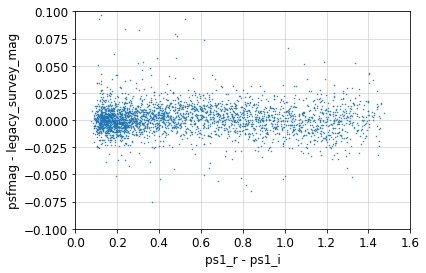

c4d_200308_000525_ooi_i_v1-photom.fits 11885


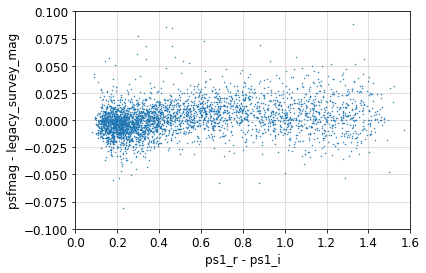

c4d_210328_014032_ooi_i_v1-photom.fits 10697


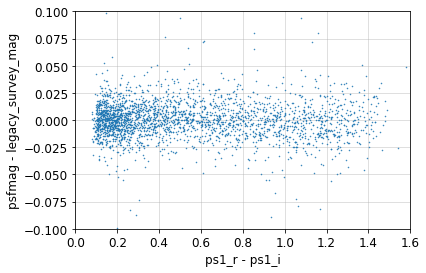

c4d_191027_081108_ooi_i_v1-photom.fits 9025


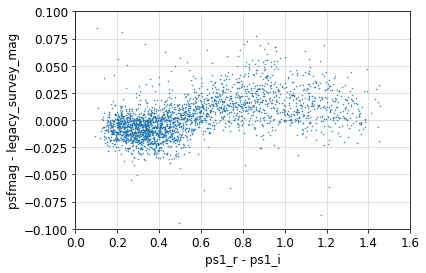

c4d_200208_033340_ooi_i_v1-photom.fits 19291


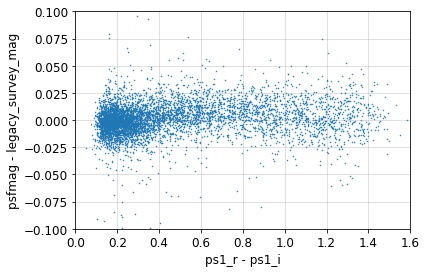

c4d_200208_022825_ooi_i_v1-photom.fits 11142


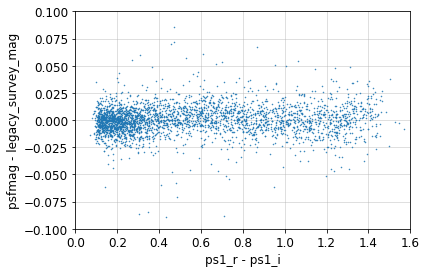

c4d_210326_000359_ooi_i_v1-photom.fits 13263


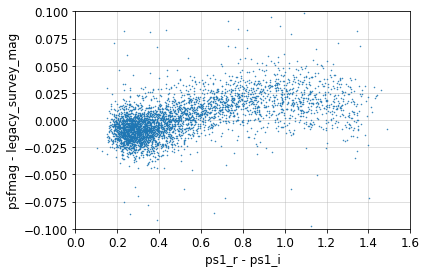

In [85]:
for fn in f_list:
    cat = Table(fitsio.read(fn))
    print(os.path.basename(fn), len(cat))
    
    mask = cat['legacy_survey_mag']!=0
    mask &= cat['psfmag']!=0
    cat = cat[mask]
    
    mask = cat['fracmasked']<0.1
    cat = cat[mask]
    
    mask = (cat['ps1_i']<18.5) & (cat['ps1_i']>16)
    plt.plot((cat['ps1_r']-cat['ps1_i'])[mask], (cat['psfmag']-cat['legacy_survey_mag'])[mask], '.', ms=1)
    plt.xlabel('ps1_r - ps1_i')
    plt.ylabel('psfmag - legacy_survey_mag')
    plt.grid(alpha=0.5)
    plt.axis([0., 1.6, -0.1, 0.1])
    plt.show()

c4d_200201_022627_ooi_i_v1-photom.fits 17775


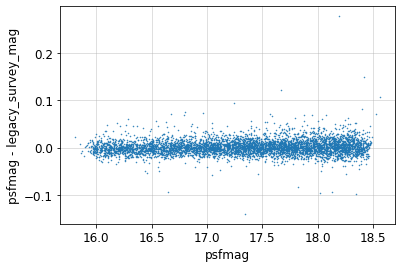

c4d_210322_004029_ooi_i_v1-photom.fits 10127


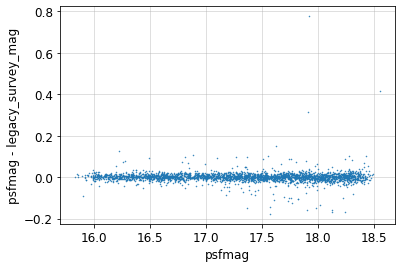

c4d_210427_001737_ooi_i_v1-photom.fits 10378


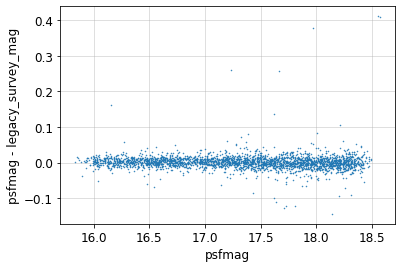

c4d_190914_083356_ooi_i_v1-photom.fits 10328


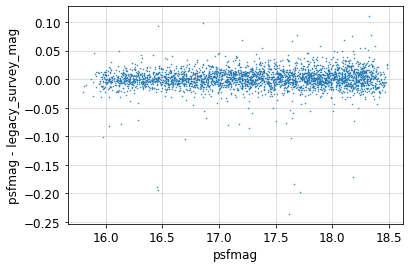

c4d_200305_002201_ooi_i_v1-photom.fits 8209


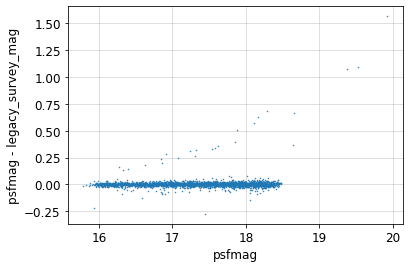

c4d_200104_034017_ooi_i_v1-photom.fits 15528


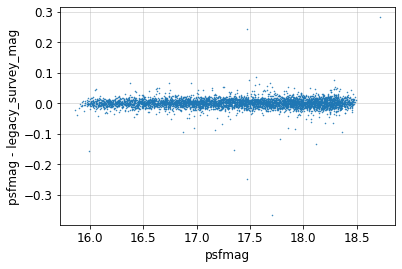

c4d_200229_004901_ooi_i_v1-photom.fits 18196


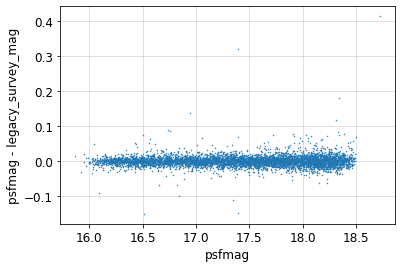

c4d_200201_021029_ooi_i_v1-photom.fits 15942


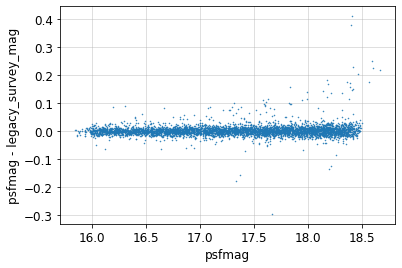

c4d_200211_020147_ooi_i_v1-photom.fits 10636


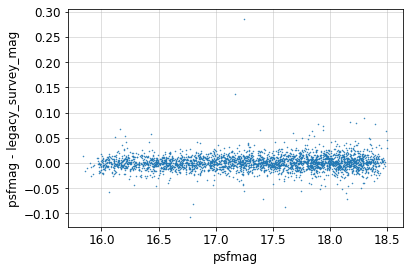

c4d_210222_002849_ooi_i_v1-photom.fits 7302


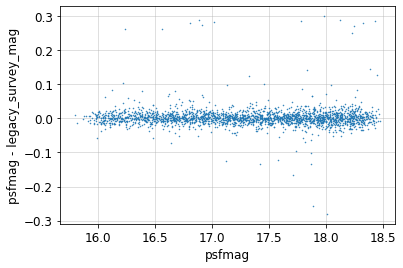

c4d_191009_042749_ooi_i_v1-photom.fits 7876


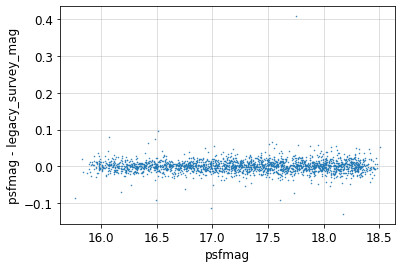

c4d_200208_042213_ooi_i_v1-photom.fits 34036


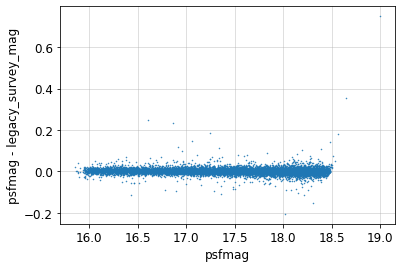

c4d_200306_004617_ooi_i_v1-photom.fits 13404


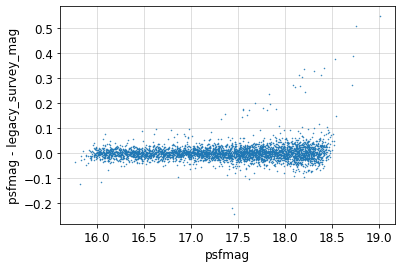

c4d_191215_043204_ooi_i_v1-photom.fits 8633


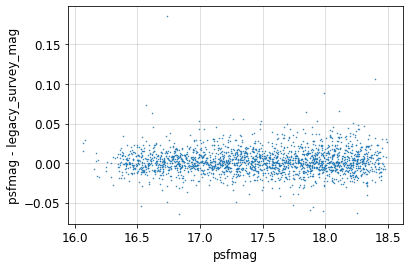

c4d_201125_025626_ooi_i_v1-photom.fits 10548


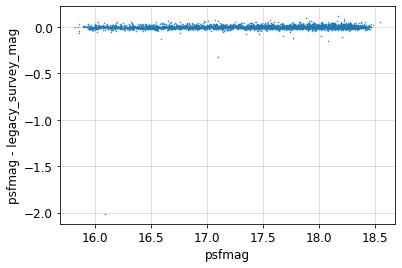

c4d_200207_021047_ooi_i_v1-photom.fits 10051


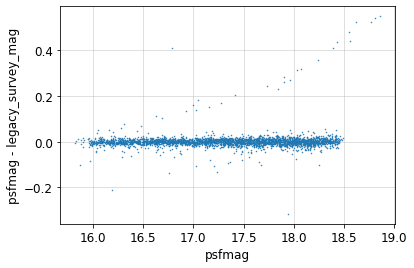

c4d_191207_054803_ooi_i_v1-photom.fits 18976


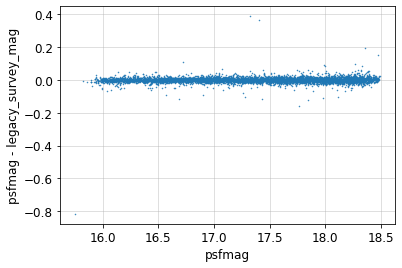

c4d_200305_012825_ooi_i_v1-photom.fits 12746


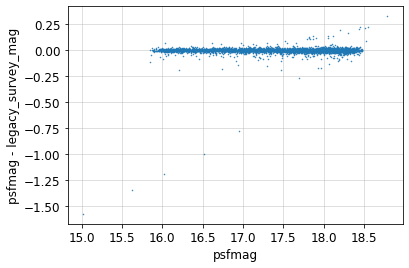

c4d_210418_004711_ooi_i_v1-photom.fits 10303


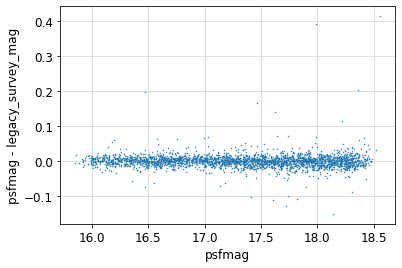

c4d_200208_005304_ooi_i_v1-photom.fits 28907


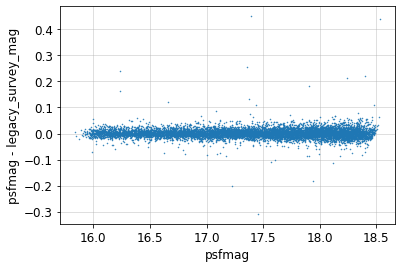

c4d_200207_015324_ooi_i_v1-photom.fits 21372


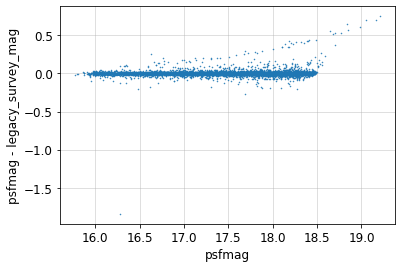

c4d_201121_043437_ooi_i_v1-photom.fits 28819


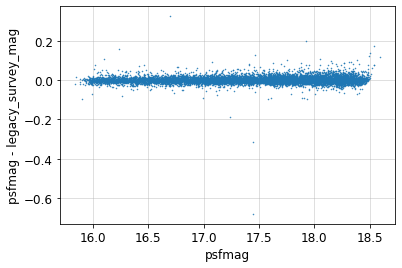

c4d_210224_020002_ooi_i_v1-photom.fits 13565


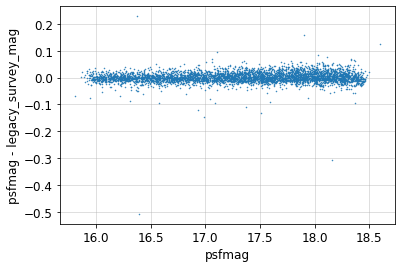

c4d_191215_050232_ooi_i_v1-photom.fits 11073


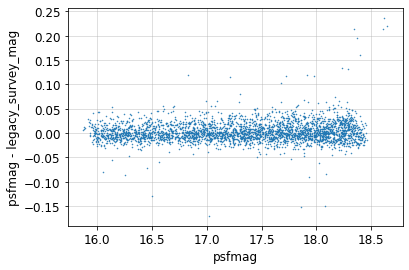

c4d_200211_012749_ooi_i_v1-photom.fits 9348


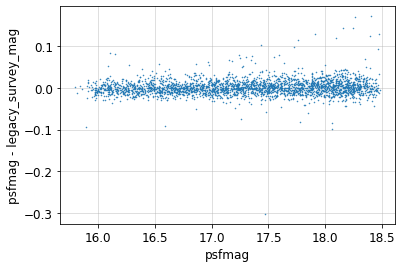

c4d_200211_010701_ooi_i_v1-photom.fits 8749


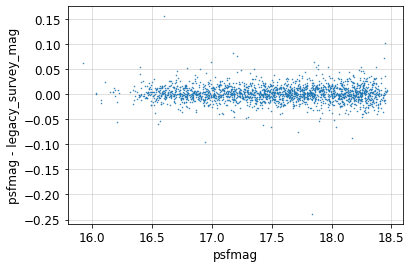

c4d_210219_003513_ooi_i_v1-photom.fits 27723


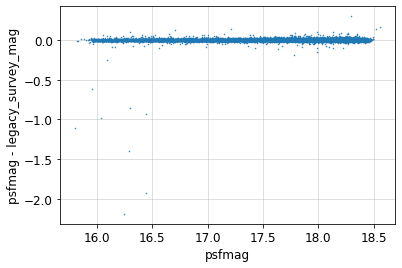

c4d_200104_042112_ooi_i_v1-photom.fits 23403


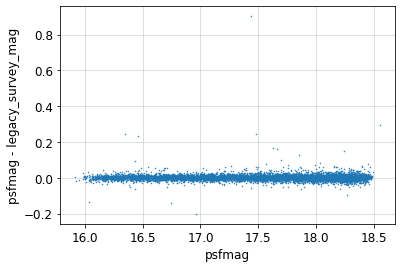

c4d_210321_000031_ooi_i_v1-photom.fits 11798


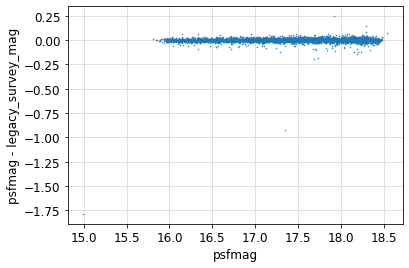

c4d_200104_033654_ooi_i_v1-photom.fits 17739


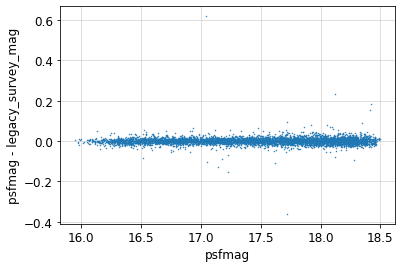

c4d_200208_035724_ooi_i_v1-photom.fits 26220


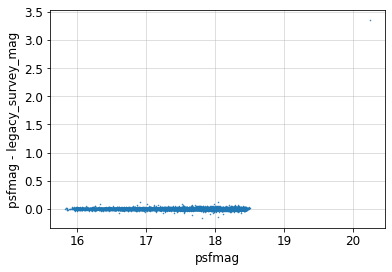

c4d_210227_004857_ooi_i_v1-photom.fits 10295


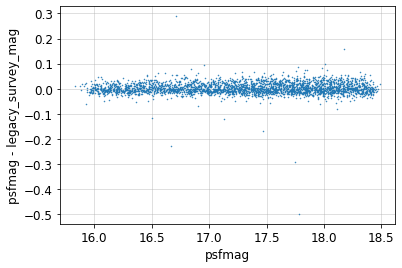

c4d_210326_001054_ooi_i_v1-photom.fits 16066


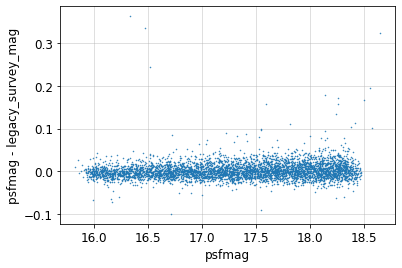

c4d_191025_073528_ooi_i_v1-photom.fits 12309


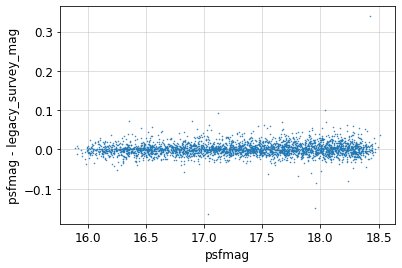

c4d_200211_020757_ooi_i_v1-photom.fits 12290


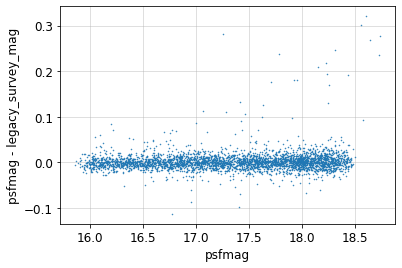

c4d_200205_004520_ooi_i_v1-photom.fits 9539


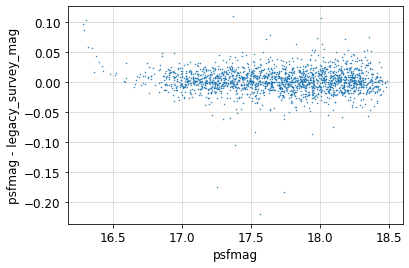

c4d_190914_083745_ooi_i_v1-photom.fits 10272


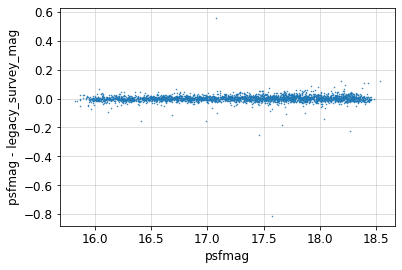

c4d_200306_012649_ooi_i_v1-photom.fits 26598


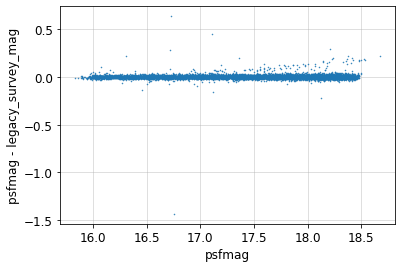

c4d_200227_010324_ooi_i_v1-photom.fits 8550


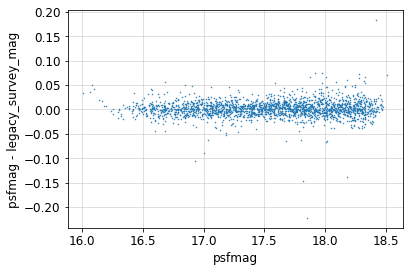

c4d_200207_005657_ooi_i_v1-photom.fits 13115


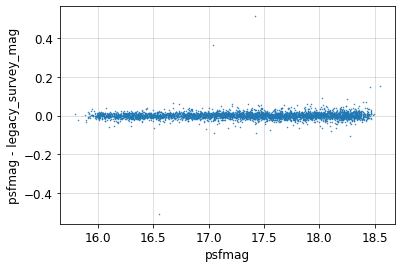

c4d_191215_054634_ooi_i_v1-photom.fits 21540


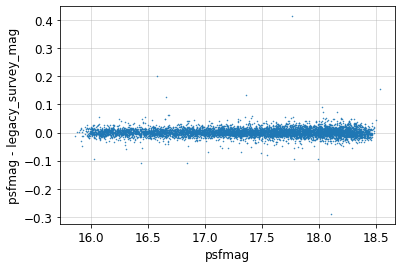

c4d_200205_013758_ooi_i_v1-photom.fits 8160


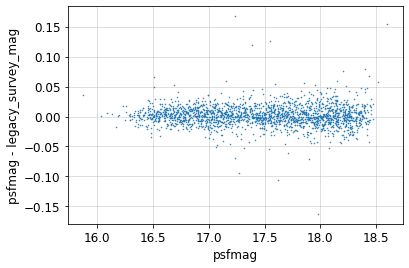

c4d_200306_004419_ooi_i_v1-photom.fits 12748


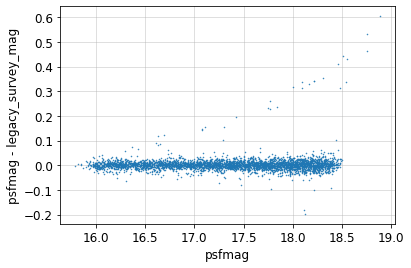

c4d_210319_003928_ooi_i_v1-photom.fits 10129


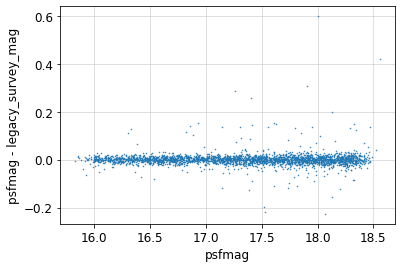

c4d_210217_023552_ooi_i_v1-photom.fits 24998


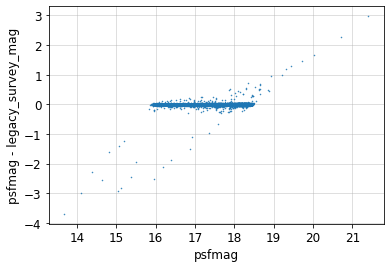

c4d_201125_021614_ooi_i_v1-photom.fits 8565


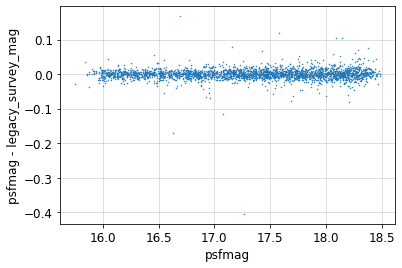

c4d_210301_001814_ooi_i_v1-photom.fits 17173


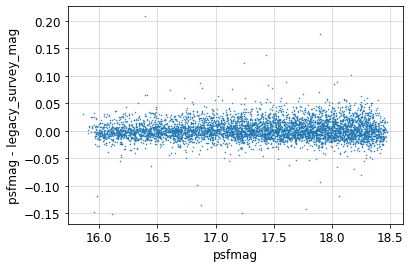

c4d_210303_001900_ooi_i_v1-photom.fits 7985


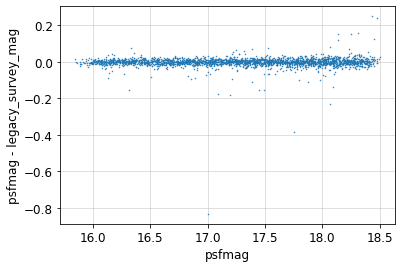

c4d_191214_062236_ooi_i_v1-photom.fits 29512


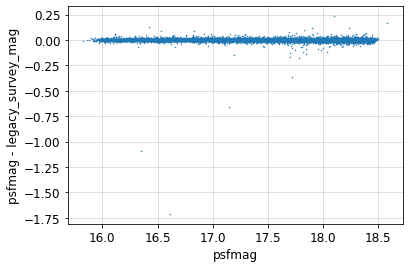

c4d_200211_025634_ooi_i_v1-photom.fits 10702


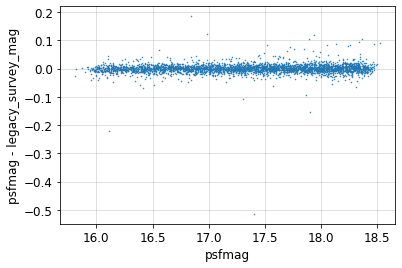

c4d_200131_013405_ooi_i_v1-photom.fits 14547


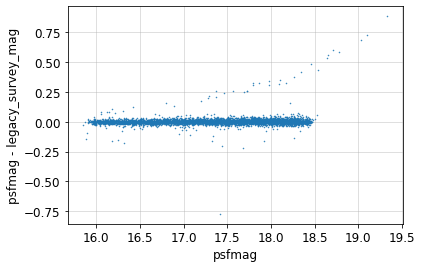

c4d_210328_031004_ooi_i_v1-photom.fits 10672


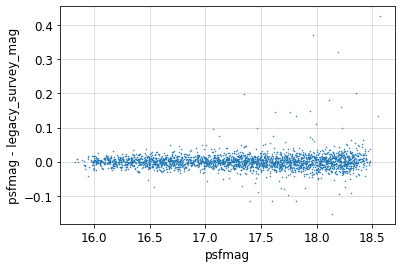

c4d_200201_004330_ooi_i_v1-photom.fits 9736


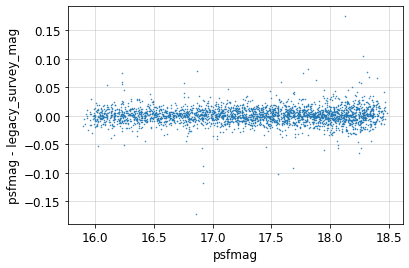

c4d_210228_005944_ooi_i_v1-photom.fits 8072


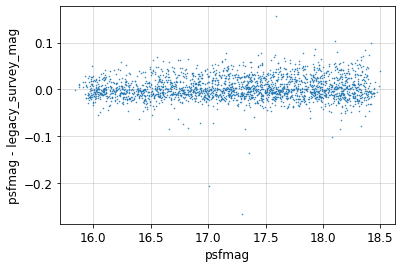

c4d_210425_032058_ooi_i_v1-photom.fits 10454


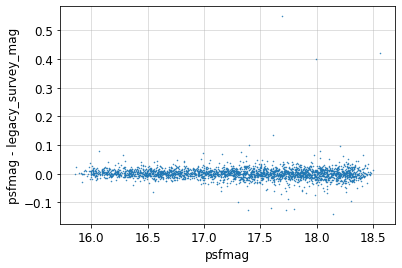

c4d_201126_045557_ooi_i_v1-photom.fits 19368


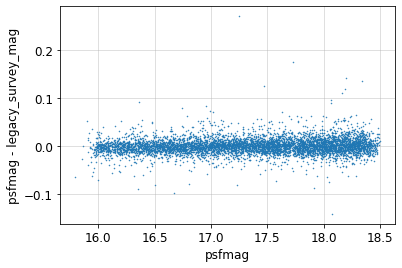

c4d_191207_045619_ooi_i_v1-photom.fits 17761


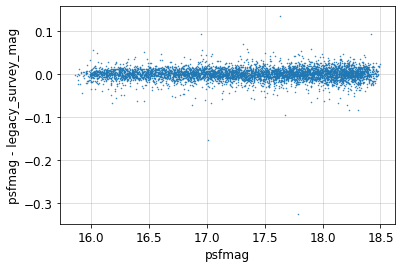

c4d_191215_042916_ooi_i_v1-photom.fits 9421


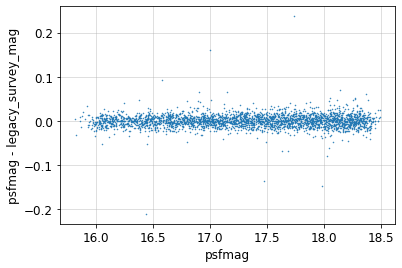

c4d_191107_021738_ooi_i_v1-photom.fits 6939


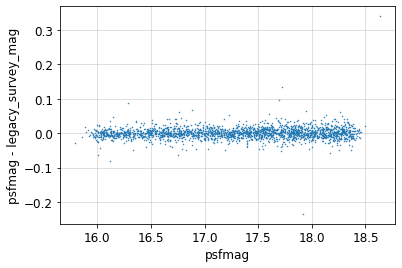

c4d_200211_033732_ooi_i_v1-photom.fits 13763


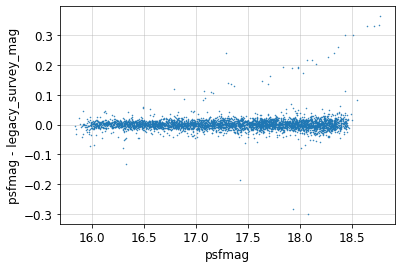

c4d_210228_011037_ooi_i_v1-photom.fits 8377


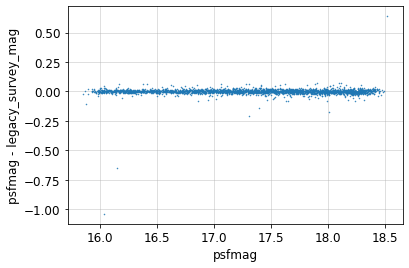

c4d_200306_005617_ooi_i_v1-photom.fits 14274


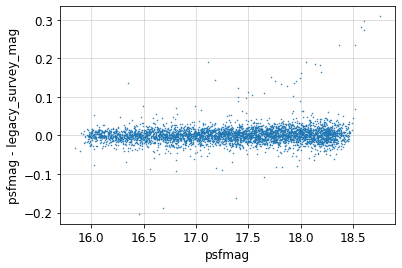

c4d_210326_000906_ooi_i_v1-photom.fits 14581


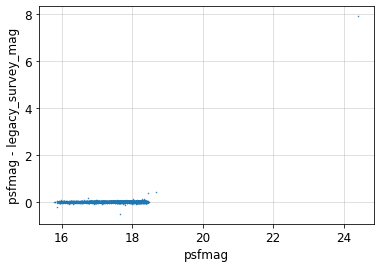

c4d_191214_055730_ooi_i_v1-photom.fits 27951


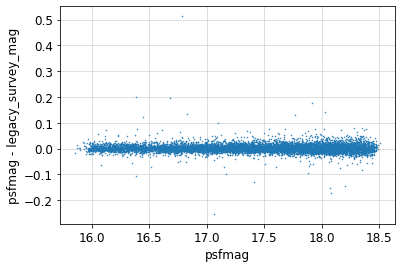

c4d_200208_040121_ooi_i_v1-photom.fits 30908


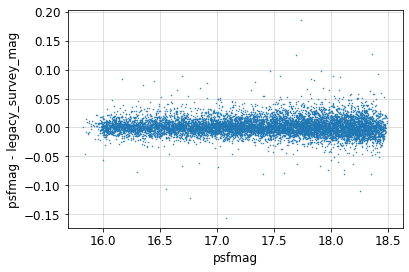

c4d_200309_004734_ooi_i_v1-photom.fits 14105


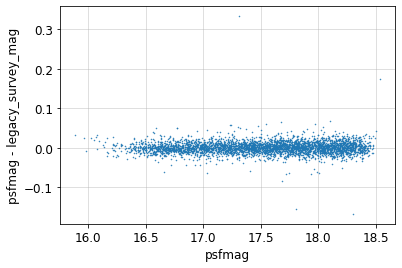

c4d_191009_040941_ooi_i_v1-photom.fits 7503


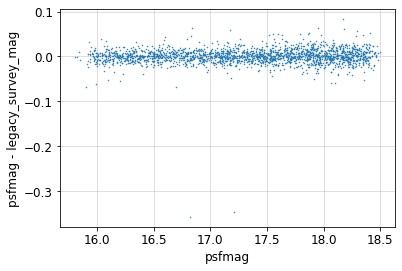

c4d_210227_011423_ooi_i_v1-photom.fits 9455


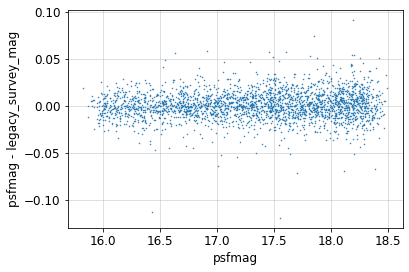

c4d_200202_014453_ooi_i_v1-photom.fits 30485


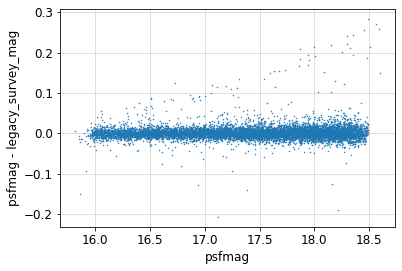

c4d_200211_013539_ooi_i_v1-photom.fits 9615


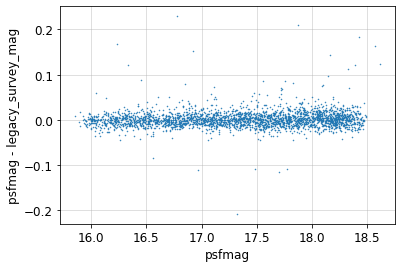

c4d_200208_020239_ooi_i_v1-photom.fits 9660


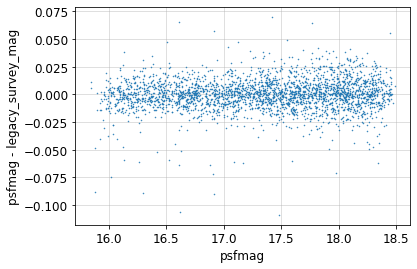

c4d_210203_004909_ooi_i_v1-photom.fits 7835


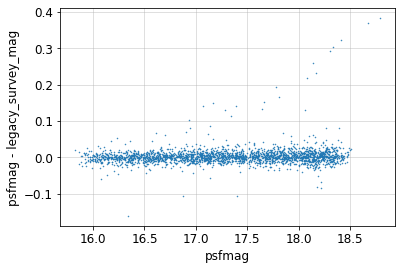

c4d_200208_015045_ooi_i_v1-photom.fits 14272


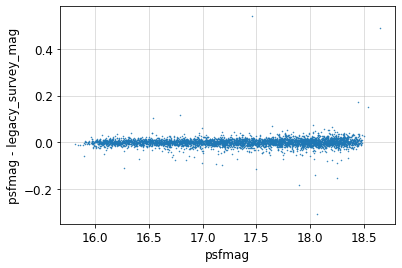

c4d_200211_015423_ooi_i_v1-photom.fits 10253


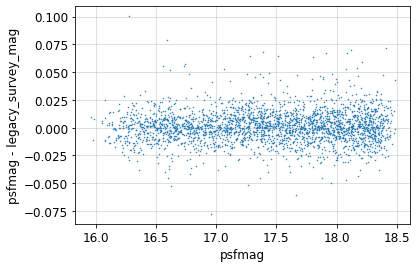

c4d_200206_015352_ooi_i_v1-photom.fits 10979


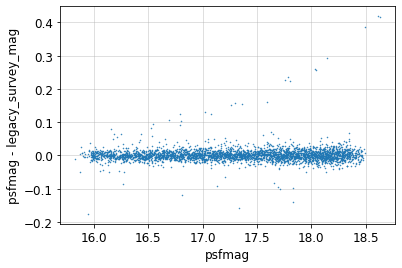

c4d_210224_015508_ooi_i_v1-photom.fits 12848


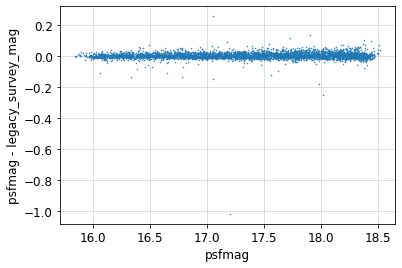

c4d_210326_235307_ooi_i_v1-photom.fits 13290


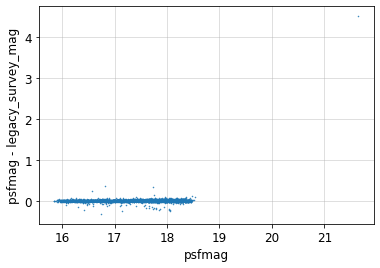

c4d_191215_051130_ooi_i_v1-photom.fits 21775


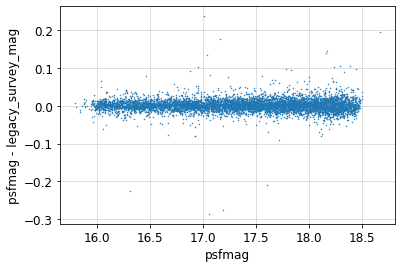

c4d_200211_012145_ooi_i_v1-photom.fits 8807


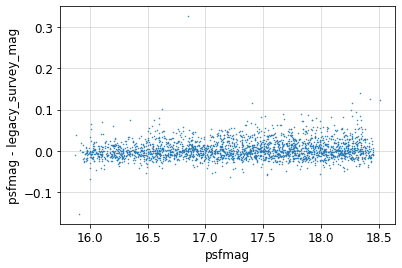

c4d_201126_050550_ooi_i_v1-photom.fits 20485


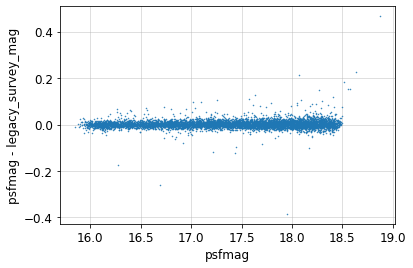

c4d_210224_013457_ooi_i_v1-photom.fits 9672


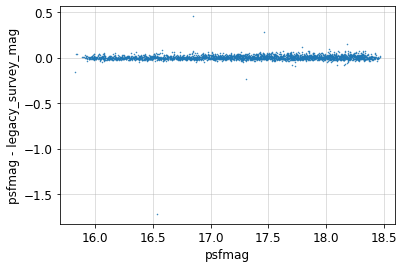

c4d_200207_014903_ooi_i_v1-photom.fits 15859


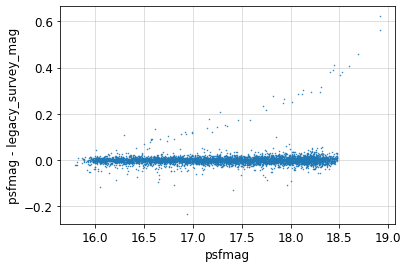

c4d_210321_000607_ooi_i_v1-photom.fits 14902


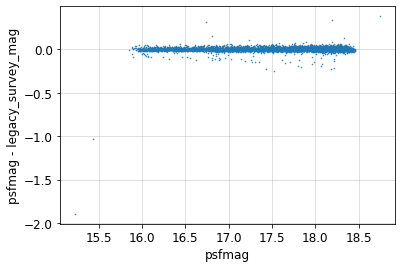

c4d_210223_003400_ooi_i_v1-photom.fits 8499


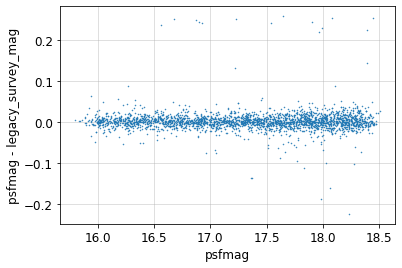

c4d_200317_002424_ooi_i_v1-photom.fits 22257


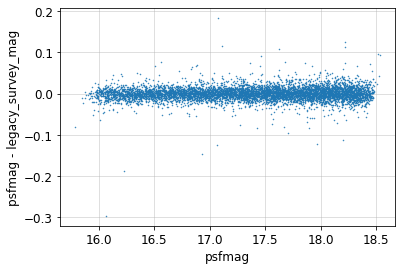

c4d_210301_002459_ooi_i_v1-photom.fits 14245


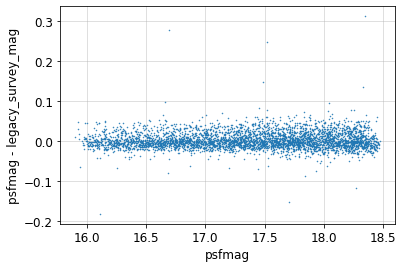

c4d_201125_025826_ooi_i_v1-photom.fits 10269


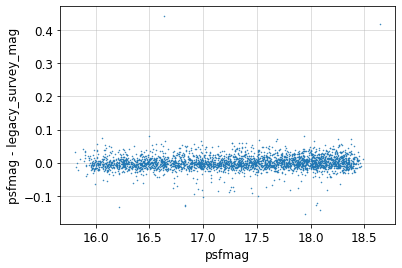

c4d_200211_014119_ooi_i_v1-photom.fits 9879


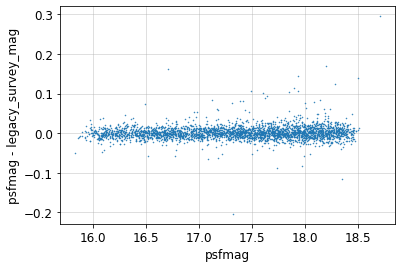

c4d_210421_010512_ooi_i_v1-photom.fits 10527


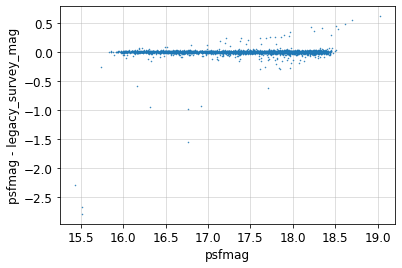

c4d_191204_050736_ooi_i_v1-photom.fits 22385


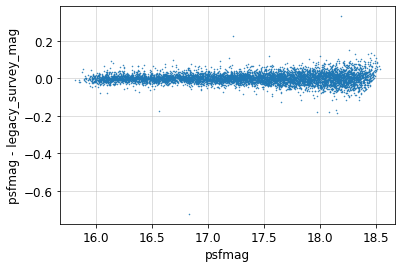

c4d_200208_013055_ooi_i_v1-photom.fits 28382


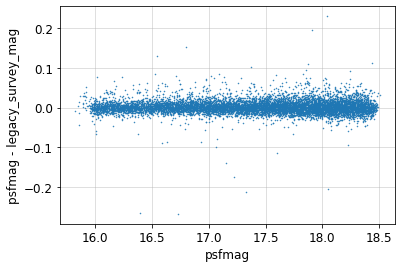

c4d_200205_015624_ooi_i_v1-photom.fits 12572


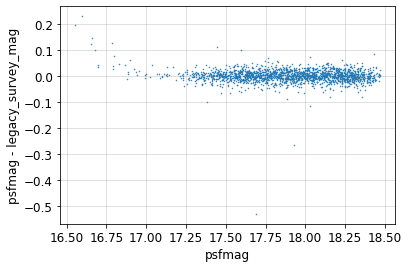

c4d_201122_025517_ooi_i_v1-photom.fits 26263


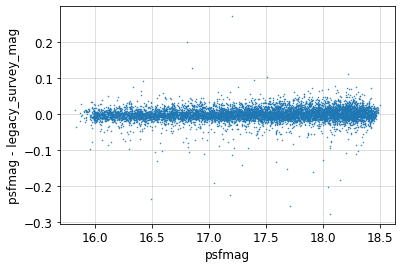

c4d_200206_013749_ooi_i_v1-photom.fits 10434


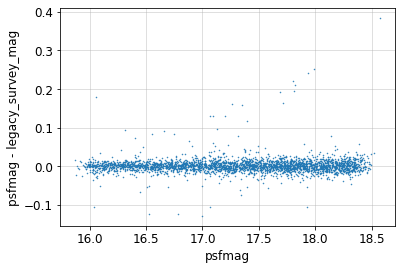

c4d_200308_000525_ooi_i_v1-photom.fits 11885


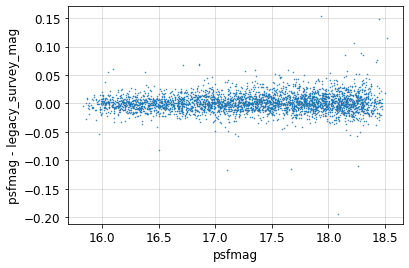

c4d_210328_014032_ooi_i_v1-photom.fits 10697


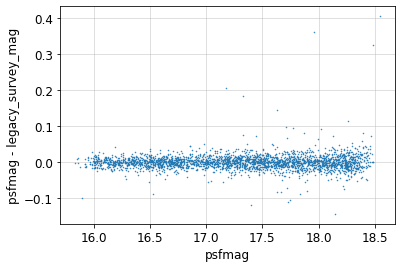

c4d_191027_081108_ooi_i_v1-photom.fits 9025


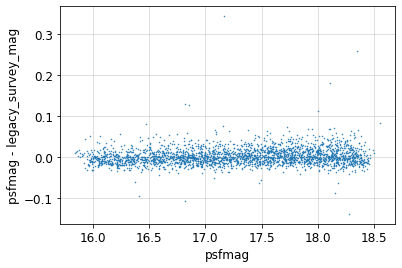

c4d_200208_033340_ooi_i_v1-photom.fits 19291


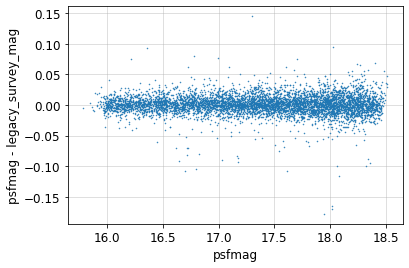

c4d_200208_022825_ooi_i_v1-photom.fits 11142


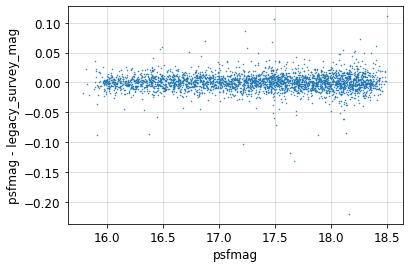

c4d_210326_000359_ooi_i_v1-photom.fits 13263


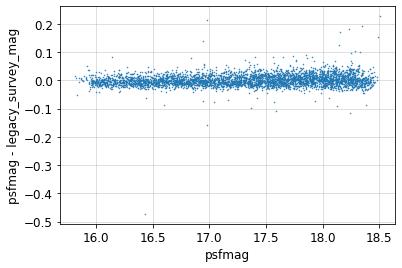

In [84]:
for fn in f_list:
    cat = Table(fitsio.read(fn))
    print(os.path.basename(fn), len(cat))
    
    mask = cat['legacy_survey_mag']!=0
    mask &= cat['psfmag']!=0
    cat = cat[mask]
    
    mask = cat['fracmasked']<0.1
    cat = cat[mask]
    
    mask = (cat['ps1_i']<18.5) & (cat['ps1_i']>16)
    plt.plot((cat['psfmag'])[mask], (cat['psfmag']-cat['legacy_survey_mag'])[mask], '.', ms=1)
    plt.grid(alpha=0.5)
    plt.xlabel('psfmag')
    plt.ylabel('psfmag - legacy_survey_mag')
#     plt.axis([15.5, 19, -0.1, 0.1])
    plt.show()